In [60]:
#!pip install scikit-learn
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [61]:
import csv
!pip install scikit-learn
!pip install pandas
!pip install seaborn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [62]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [63]:
NUM_CLASSES = 10

# 学習データ読み込み

In [64]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [65]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [68]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [70]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [71]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/52 [..............................] - ETA: 8s - loss: 2.4187 - accuracy: 0.0781
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [==============================] - 0s 2ms/step - loss: 2.3188 - accuracy: 0.1032 - val_loss: 2.2355 - val_accuracy: 0.2686
Epoch 2/1000
 1/52 [..............................] - ETA: 0s - loss: 2.2445 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [==============================] - 0s 702us/step - loss: 2.1637 - accuracy: 0.2272 - val_loss: 2.0530 - val_accuracy: 0.3124
Epoch 3/1000
 1/52 [..............................] - ETA: 0s - loss: 2.0249 - accuracy: 0.2969
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [==============================] - 0s 693us/step - loss: 1.9779 - accuracy: 0.3127 - val_loss: 1.8471 - val_accuracy: 0.4355
Epoch 4/1000
 1/52 [..............................] - ETA: 0s - loss: 1.9365 - accuracy: 0.2812
Epoch 4: s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [==============================] - 0s 719us/step - loss: 1.4342 - accuracy: 0.4961 - val_loss: 1.1471 - val_accuracy: 0.7811
Epoch 8/1000
 1/52 [..............................] - ETA: 0s - loss: 1.3382 - accuracy: 0.5703
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [==============================] - 0s 724us/step - loss: 1.3410 - accuracy: 0.5413 - val_loss: 1.0041 - val_accuracy: 0.7898
Epoch 9/1000
 1/52 [..............................] - ETA: 0s - loss: 1.3121 - accuracy: 0.4609
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [==============================] - 0s 702us/step - loss: 1.2531 - accuracy: 0.5624 - val_loss: 0.8738 - val_accuracy: 0.8076
Epoch 10/1000
 1/52 [..............................] - ETA: 0s - loss: 1.1639 - accuracy: 0.6328
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
52/52 [=====

In [72]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/18 [>.............................] - ETA: 0s - loss: 0.1470 - accuracy: 0.9766

18/18 [==============================] - 0s 351us/step - loss: 0.1834 - accuracy: 0.9667


In [73]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [74]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 23ms/step
[3.8521401e-07 4.1909413e-03 3.5630655e-05 3.8212079e-07 3.1032728e-04
 5.9925089e-05 7.0946370e-03 3.0476659e-07 8.8285175e-05 9.8821926e-01]
9


# 混同行列


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
69/69 [==============================] - 0s 268us/step


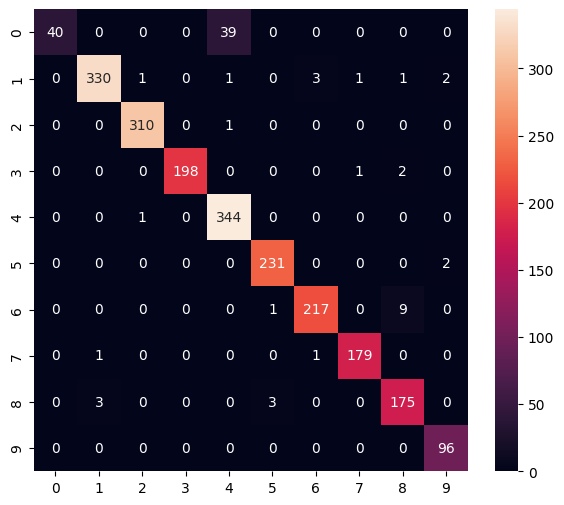

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.51      0.67        79
           1       0.99      0.97      0.98       339
           2       0.99      1.00      1.00       311
           3       1.00      0.99      0.99       201
           4       0.89      1.00      0.94       345
           5       0.98      0.99      0.99       233
           6       0.98      0.96      0.97       227
           7       0.99      0.99      0.99       181
           8       0.94      0.97      0.95       181
           9       0.96      1.00      0.98        96

    accuracy                           0.97      2193
   macro avg       0.97      0.94      0.95      2193
weighted avg       0.97      0.97      0.96      2193



In [75]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [76]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpgvkdtl7c/assets


INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpgvkdtl7c/assets
2024-03-10 19:50:34.219422: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-10 19:50:34.219442: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32: 3)
  (f32: 1)


6872

# 推論テスト

In [78]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [79]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [80]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [81]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 54 µs, sys: 26 µs, total: 80 µs
Wall time: 69.9 µs


In [82]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.8521404e-07 4.1909395e-03 3.5630623e-05 3.8212082e-07 3.1032698e-04
 5.9925147e-05 7.0946408e-03 3.0476718e-07 8.8285095e-05 9.8821926e-01]
9
